In [1]:
def RK4(dydt, initial_y, time_span, step_size):
    '''
    Returns the Fourth Order Runge-Kutta Method solution to a differential equation.
    The dependent variable (y) can be an entire state (ex: [angle, velocity] over time).
    
    Parameters:
        dydt: callable function of form func(t, y); 
              dydt returns the derivative of y with respect to t. (ex: y'(t, y) = dydt(t, y))
        initial_y: initial state of dependent variable; has shape n
        time_span: 2 tuple (initial_t, final_t);
        step_size: size of discrete step;
    Returns:
        list:
            list[0]: list of independent variable over time_span
            list[1]: list of dependent variables of shape n corresponding to list[0]
    '''
    iteration_count = int((time_span[1] - time_span[0])/step_size) + 1
    solution = [[time_span[0]], [initial_y]]
    
    is_iterable = True
    try:
        iter(initial_y)
    except TypeError:
        is_iterable = False
        
    for n in range(1, iteration_count):
        t_prev = solution[0][n-1]
        y_prev = solution[1][n-1]
        
        if is_iterable:
            k1 = dydt(t_prev, y_prev)
            k2 = dydt(t_prev + step_size/2, [y_prev[i] + step_size*k1[i]/2 for i in range(len(y_prev))])
            k3 = dydt(t_prev + step_size/2, [y_prev[i] + step_size*k2[i]/2 for i in range(len(y_prev))])
            k4 = dydt(t_prev + step_size, [y_prev[i] + step_size*k3[i] for i in range(len(y_prev))])
            yn = [y_prev[i] + (step_size/6)*(k1[i] + 2*k2[i] + 2*k3[i] + k4[i]) for i in range(len(y_prev))]
        else:
            k1 = dydt(t_prev, y_prev)
            k2 = dydt(t_prev + step_size/2, y_prev + step_size*k1/2)
            k3 = dydt(t_prev + step_size/2, y_prev + step_size*k2/2)
            k4 = dydt(t_prev + step_size, y_prev + step_size*k3)
            yn = y_prev + (step_size/6)*(k1 + 2*k2 + 2*k3 + k4)
        
        tn = n*step_size
        solution[0].append(tn)
        solution[1].append(yn)
    
    if is_iterable:
        to_return = [solution[0], []]
        for i in range(len(initial_y)):
            to_return[1].append([])
            for state in solution[1]:
                to_return[1][i].append(state[i])
    else:
        to_return = solution
    
    return to_return

In [2]:
def pendODE(time, state):
    ang = state[0]
    vel = state[1]
    ang_dot = vel
    vel_dot = (-g/l) * math.sin(ang) - f*vel
    return [ang_dot, vel_dot]

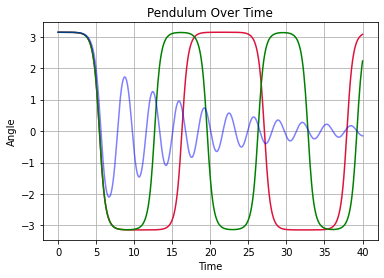

In [3]:
import math
import matplotlib.pyplot as plt

init = [179.99 * math.pi/180, 0]
g = 9.8
l = 2.5
f = 0

solution = RK4(pendODE, init, (0, 40), 0.001)
solution2 = RK4(pendODE, init, (0, 40), 0.1)
f = 0.15
solution3 = RK4(pendODE, init, (0, 40), 0.001)

t = solution[0]
a = solution[1][0]
v = solution[1][1]

plt.title("Pendulum Over Time")
plt.grid(True)
plt.xlabel('Time')
plt.ylabel('Angle')
plt.plot(t, a, color='crimson')
plt.plot(solution2[0], solution2[1][0], color='green')
plt.plot(solution3[0], solution3[1][0], color = (0,0,1, 0.5))
#plt.plot(t, v)
plt.show()

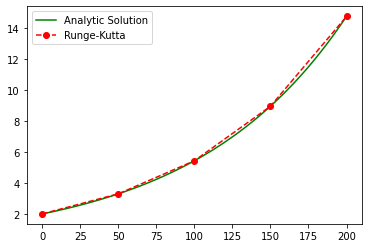

In [4]:
def power(t, y):
    return 0.01 * y

import numpy as np

x = np.linspace(0, 200, 100)
y = 2 * np.e**(0.01*x)

t, h = RK4(power, 2, (0, 200), 50)

plt.plot(x, y, color = 'green', label="Analytic Solution")
plt.plot(t, h, 'ro--', label = "Runge-Kutta")
plt.legend()
plt.show()